In [1]:
import numpy as np # Paquetería Algebra Lineal
import pandas as pd # Procesamiento de datos
import matplotlib.pyplot as plt #librerias de visualización
import seaborn as sns

In [5]:
#Cargamos el data set 
df = pd.read_csv('FIFA-21 Complete.csv',sep = ';') #reading our data which is ';' seperated
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


## Descripción de los datos

In [6]:
# Variables
df.columns

Index(['player_id', 'name', 'nationality', 'position', 'overall', 'age',
       'hits', 'potential', 'team'],
      dtype='object')

In [7]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [8]:
## Variables cuantitativas
df.describe()

,player_id,overall,age,hits,potential
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,220912.660531,67.274345,26.311440,2.689450,71.738057
std,27738.072671,5.924392,4.556077,10.846286,5.961968
min,41.000000,56.000000,17.000000,0.000000,57.000000
25%,204881.000000,63.000000,23.000000,0.000000,67.000000
50%,226753.000000,67.000000,26.000000,0.000000,71.000000
75%,241587.000000,71.000000,30.000000,2.000000,76.000000
max,256469.000000,94.000000,43.000000,371.000000,95.000000


In [9]:
#Revisamos si tiene valores nulos 
df.isnull().sum() 

player_id      0
name           0
nationality    0
position       0
overall        0
age            0
hits           0
potential      0
team           0
dtype: int64

In [10]:
# Número de términos únicos por variable
df.nunique()

player_id      17981
name           17701
nationality      162
position         232
overall           39
age               27
hits             119
potential         39
team             713
dtype: int64

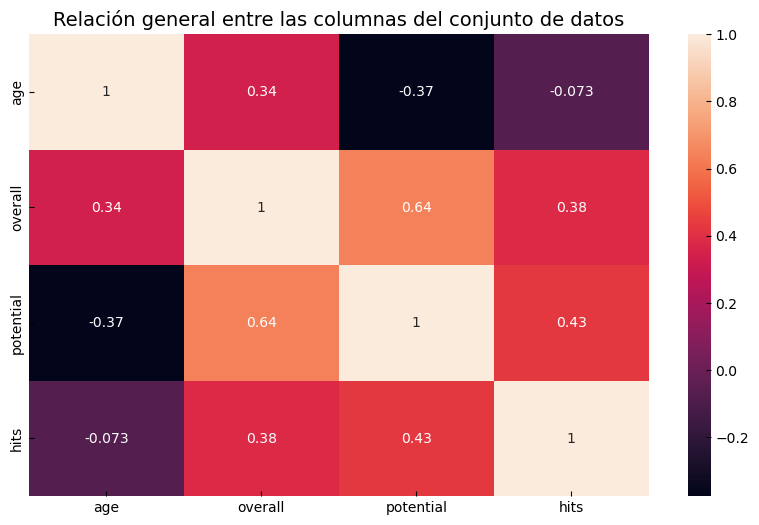

In [26]:
#Correlación entre las columnas de edad, puntuación, potencial y hits
plt.figure(figsize=(10,6))
plt.style.use('bmh') 
sns.heatmap(df[['age', 'nationality', 'overall', 'potential', 'team', 'hits', 'position']].corr(), annot = True) 
plt.title('Relación general entre las columnas del conjunto de datos', fontsize = 14)
plt.show()

## Visualización de datos 

###Análisis por paises

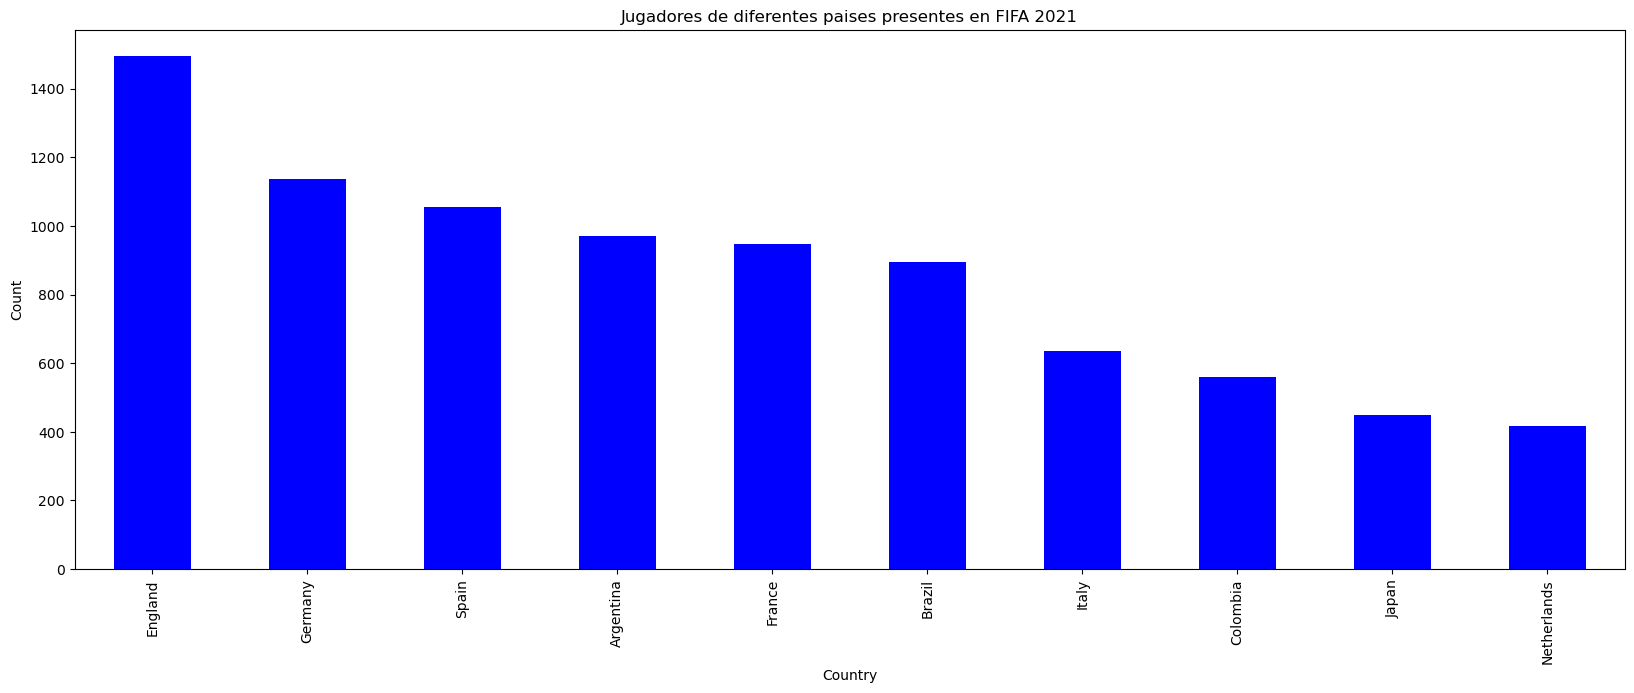

In [18]:
#Top 50 paises con más jugadores en FIFA 2021
plt.style.use('default') 
plt.figure(figsize = (20,7))
df['nationality'].value_counts().head(10).plot.bar(color = 'blue')
plt.title('Jugadores de diferentes paises presentes en FIFA 2021')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [31]:
#Calificaciones de los jugadores alrededor del mundo 

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
rating = pd.DataFrame(df.groupby(['nationality'])['overall'].sum().reset_index())
count = pd.DataFrame(rating.groupby('nationality')['overall'].sum().reset_index())

plot = [go.Choropleth(
            colorscale = 'sunset',
            locationmode = 'country names',
            locations = count['nationality'],
            text = count['nationality'],
            z = count['overall'],
)]

layout = go.Layout(title = 'País vs Calificaciones generales de los jugadores que pertenecen a ellos')

fig = go.Figure(data = plot, layout = layout)
py.iplot(fig)

In [33]:
#Potencial de los jugadores al rededor del mundo 
rating = pd.DataFrame(df.groupby(['nationality'])['potential'].sum().reset_index())
count = pd.DataFrame(rating.groupby('nationality')['potential'].sum().reset_index())

plot = [go.Choropleth(
            colorscale = 'sunset',
            locationmode = 'country names',
            locations = count['nationality'],
            text = count['nationality'],
            z = count['potential'],
)]

layout = go.Layout(title = 'País vs Potencial de los jugadores que pertenecen a ellos')

fig = go.Figure(data = plot, layout = layout)
py.iplot(fig)

###Análisis por edades

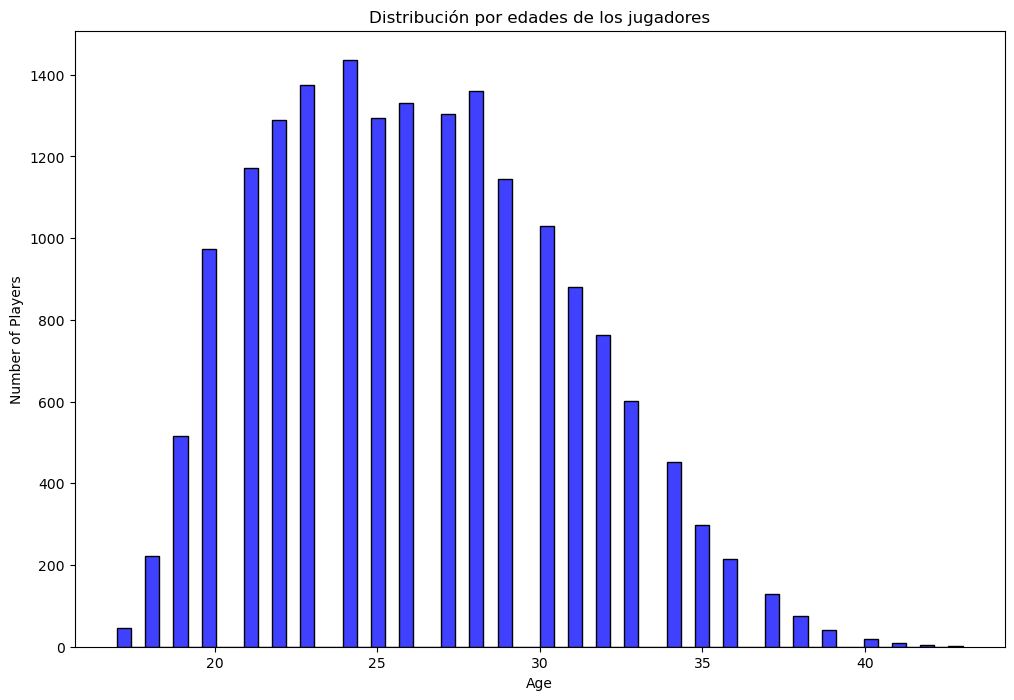

In [36]:
#comprobando la distribución por edades de los jugadores en FIFA-2021
plt.style.use('default') 
age  = df.age
plt.figure(figsize = (12,8))
ax = sns.histplot(age,bins = 60,kde = False,color ='blue')
ax.set_ylabel('Number of Players')
ax.set_xlabel('Age')
ax.set_title('Distribución por edades de los jugadores')
plt.show()

In [37]:
#Los 10 jugadores más jovenes en el juego 
df.sort_values('age', ascending = True)[['name', 'age', 'team', 'nationality']].head(10) 

,name,age,team,nationality
1637,Eduardo Camavinga,17,Stade Rennais FC,France
15008,Gabriele Plechero,17,Cittadella,Italy
14915,Jayden Nelson,17,Toronto FC,Canada
17075,Tom Dickson-Peters,17,Norwich City,Scotland
17066,Elias Damergy,17,Stade Rennais FC,Tunisia
17062,Matías Arezo,17,Club Atlético River Plate,Uruguay
16430,Lucas Greno,17,Club Plaza de Deportes Colonia,Uruguay
17040,Simon Ngapandouetnbu,17,Olympique de Marseille,Cameroon
17035,Fidel Ambríz,17,Club León,Mexico
14928,Santiago Cartagena,17,Club Nacional de Football,Uruguay


In [38]:
#Los 10 jugadores con más edad en FIFA
df.sort_values('age', ascending = False)[['name', 'age', 'team', 'nationality']].head(10) 

,name,age,team,nationality
13767,Hussain Omar Sulaimani,43,Al Ahli,Saudi Arabia
12887,Leao Butrón,43,Club Alianza Lima,Peru
14977,Luis Fernando Fernández,42,Sociedad Deportiva Aucas,Colombia
222,Gianluigi Buffon,42,Juventus,Italy
726,Hilton,42,Montpellier Hérault SC,Brazil
4150,Cristian Lucchetti,42,Atlético Tucumán,Argentina
8060,Jean-François Gillet,41,Standard de Liège,Belgium
6914,Lee Dong Gook,41,Jeonbuk Hyundai Motors,Korea Republic
16980,Michael Gurski,41,SpVgg Unterhaching,Germany
9252,Robinson Zapata,41,Jaguares Fútbol Club,Colombia


In [39]:
#Los 10 equipos con jugadores más jóvenes 
df.groupby(['team'])['age'].mean().sort_values(ascending = True).head(10)

team
UCD AFC                  21.000000
FC Groningen             22.068966
FC Nordsjælland          22.157895
FC Bayern München II     22.240000
Fortuna Sittard          22.666667
SC Heerenveen            22.869565
KRC Genk                 23.000000
RB Leipzig               23.031250
OGC Nice                 23.115385
AZ                       23.142857
Name: age, dtype: float64

In [40]:
# Los 10 equipos con el equipo con más años
df.groupby(['team'])['age'].mean().sort_values(ascending = False).head(10) 

team
Beijing Renhe FC                        31.333333
Tianjin Tianhai FC                      30.700000
Mineros de Guayana                      30.333333
Júbilo Iwata                            30.250000
Chongqing Dangdai Lifan FC SWM Team     30.166667
Guangzhou R&F FC                        30.117647
Tianjin TEDA FC                         30.055556
Shanghai Greenland Shenhua FC           30.043478
Perth Glory                             30.000000
Gyeongnam FC                            29.916667
Name: age, dtype: float64

In [47]:
#Comprobar las diferentes posiciones y el número de jugadores que las juegan
#CB-Center Back (Defensa Central)
#GK-Goalkeeper (Portero)
#ST-Striker (Delantero Central)
#CDM-Central Defensive Midfielder(Defensa Central)
#LB-Left Back(Defensa Izquierda)
df['position'].value_counts() 

CB               2296
GK               1884
ST               1757
CDM|CM           1546
LB                695
                 ... 
LB|RW               1
LWB|CM|CAM|LW       1
RB|RW|LW            1
CB|CF               1
CB|RM|LM            1
Name: position, Length: 232, dtype: int64

In [48]:
#Los 10 mejores Defensas Central
df[df['position'] == 'CB'][['name', 'age', 'team', 'nationality']].head(10) 

,name,age,team,nationality
3,Virgil van Dijk,29,Liverpool,Netherlands
21,Sergio Ramos,34,Real Madrid,Spain
25,Kalidou Koulibaly,29,Napoli,Senegal
33,Piqué,33,FC Barcelona,Spain
34,Giorgio Chiellini,35,Juventus,Italy
37,Aymeric Laporte,26,Manchester City,France
49,Diego Godín,34,Inter,Uruguay
50,Mats Hummels,31,Borussia Dortmund,Germany
54,Thiago Silva,35,Paris Saint-Germain,Brazil
56,Milan Škriniar,25,Inter,Slovakia


In [49]:
#Los 10 mejores Porteros
df[df['position'] == 'GK'][['name', 'age', 'team', 'nationality']].head(10) 

,name,age,team,nationality
4,Jan Oblak,27,Atlético Madrid,Slovenia
8,Alisson,27,Liverpool,Brazil
11,Marc-André ter Stegen,28,FC Barcelona,Germany
20,Manuel Neuer,34,FC Bayern München,Germany
22,Ederson,26,Manchester City,Brazil
27,De Gea,29,Manchester United,Spain
28,Thibaut Courtois,28,Real Madrid,Belgium
32,Samir Handanovic,36,Inter,Slovenia
42,Keylor Navas,33,Paris Saint-Germain,Costa Rica
47,Wojciech Szczesny,30,Juventus,Poland


In [50]:
#Los 10 mejores Delanteros Centrales
df[df['position'] == 'ST'][['name', 'age', 'team', 'nationality']].head(10) 

,name,age,team,nationality
6,Robert Lewandowski,31,FC Bayern München,Poland
12,Sergio Agüero,32,Manchester City,Argentina
15,Harry Kane,27,Tottenham Hotspur,England
19,Luis Suárez,33,FC Barcelona,Uruguay
43,Ciro Immobile,30,Lazio,Italy
62,Timo Werner,24,RB Leipzig,Germany
64,Jamie Vardy,33,Leicester City,England
69,Mauro Icardi,27,Paris Saint-Germain,Argentina
72,Romelu Lukaku,27,Inter,Belgium
78,Edinson Cavani,33,Paris Saint-Germain,Uruguay


In [51]:
# Los 10 mejores jugadores del juego 
df[['name', 'age', 'team', 'nationality']].head(10) #Top 10 Players present in the game

,name,age,team,nationality
0,Lionel Messi,33,FC Barcelona,Argentina
1,Cristiano Ronaldo,35,Juventus,Portugal
2,Neymar Jr,28,Paris Saint-Germain,Brazil
3,Virgil van Dijk,29,Liverpool,Netherlands
4,Jan Oblak,27,Atlético Madrid,Slovenia
5,Kevin De Bruyne,29,Manchester City,Belgium
6,Robert Lewandowski,31,FC Bayern München,Poland
7,Eden Hazard,29,Real Madrid,Belgium
8,Alisson,27,Liverpool,Brazil
9,Mohamed Salah,28,Liverpool,Egypt


/Users/rosaguerrero/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



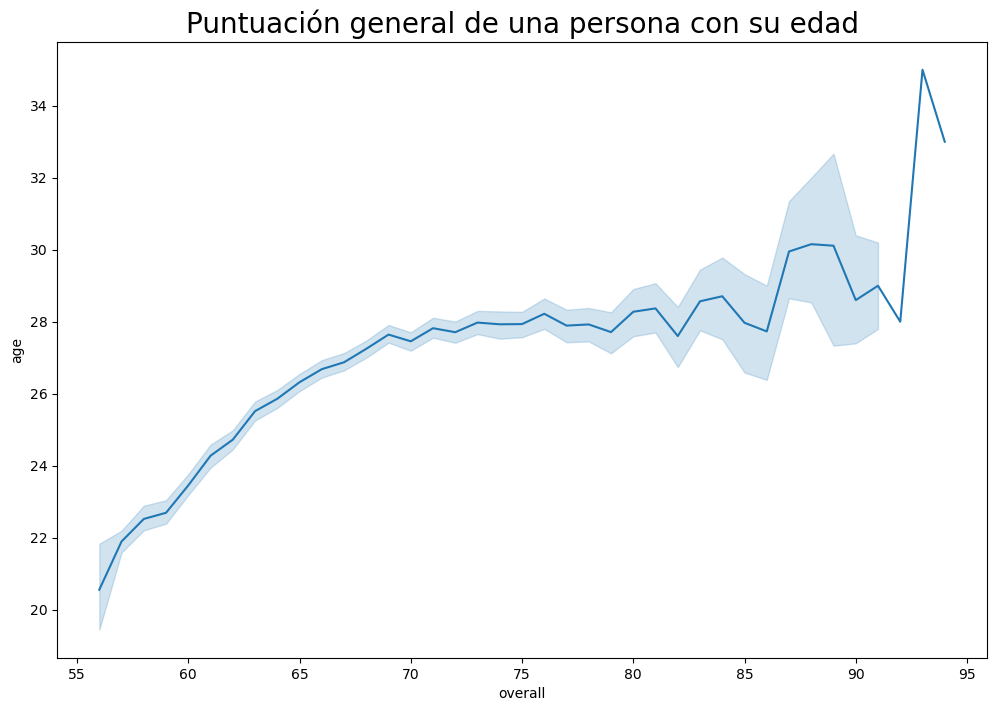

In [53]:
#comparar la puntuación general de una persona con su edad
plt.figure(figsize=(12,8))
sns.lineplot(df['overall'], df['age'], palette = "Set1")
plt.title('Puntuación general de una persona con su edad', fontsize = 20)
plt.show()

/Users/rosaguerrero/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



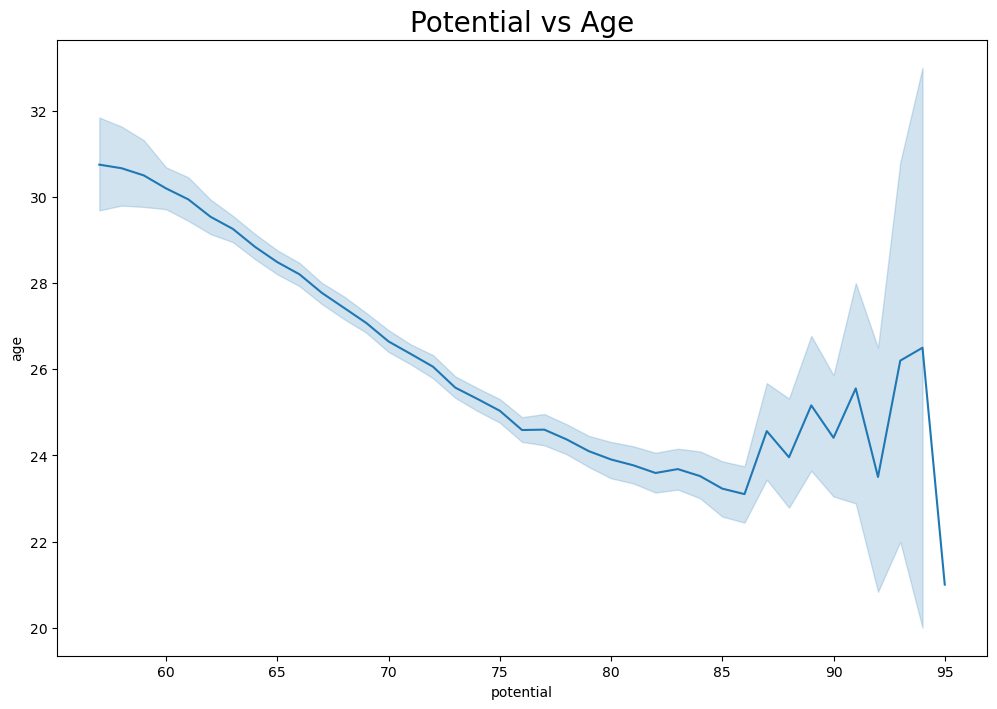

In [54]:
#Comparar el potencial de un jugador y su edad
plt.figure(figsize=(12,8))
sns.lineplot(df['potential'], df['age'], palette = "Set1")
plt.title('Potencial de un jugador y su edad', fontsize = 20)
plt.show()

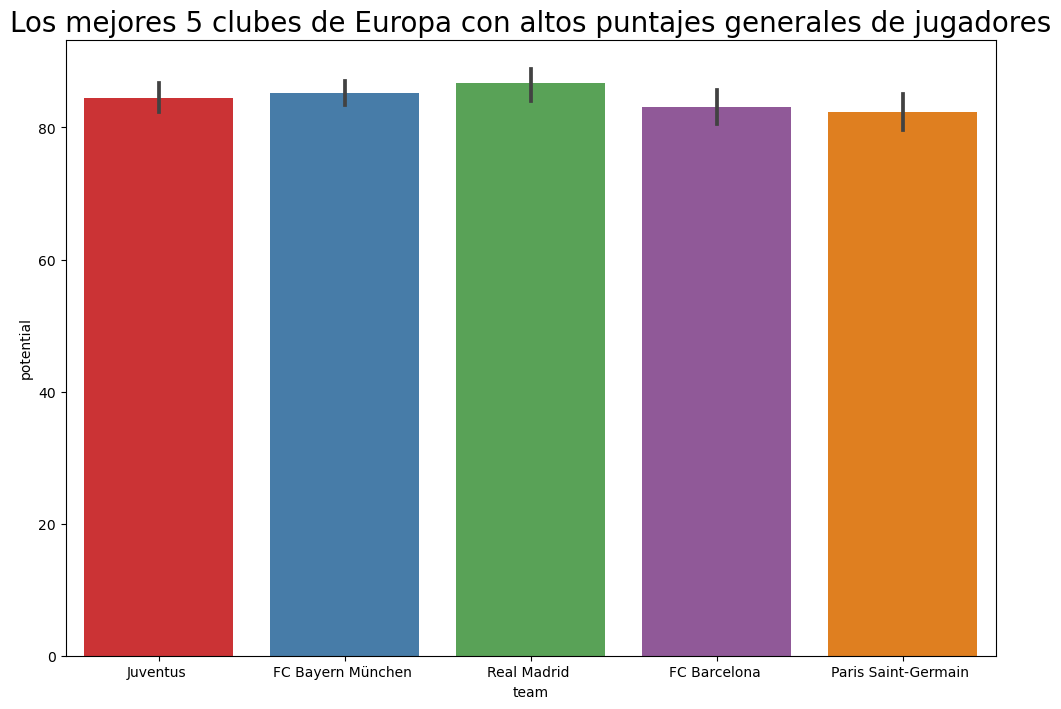

In [56]:
#Los mejores clubes de las 5 mejores ligas de Europa con altos puntajes generales de jugadores
plt.figure(figsize=(12,8))
top = ('FC Barcelona ', 'Juventus ', 'Paris Saint-Germain ', 'Real Madrid ', 'FC Bayern München ')
df2 = df.loc[df['team'].isin(top)  & df['potential'] ]

ax = sns.barplot(x=df2['team'], y=df2['potential'], palette="Set1");
ax.set_title(label='Los mejores 5 clubes de Europa con altos puntajes generales de jugadores', fontsize=20);

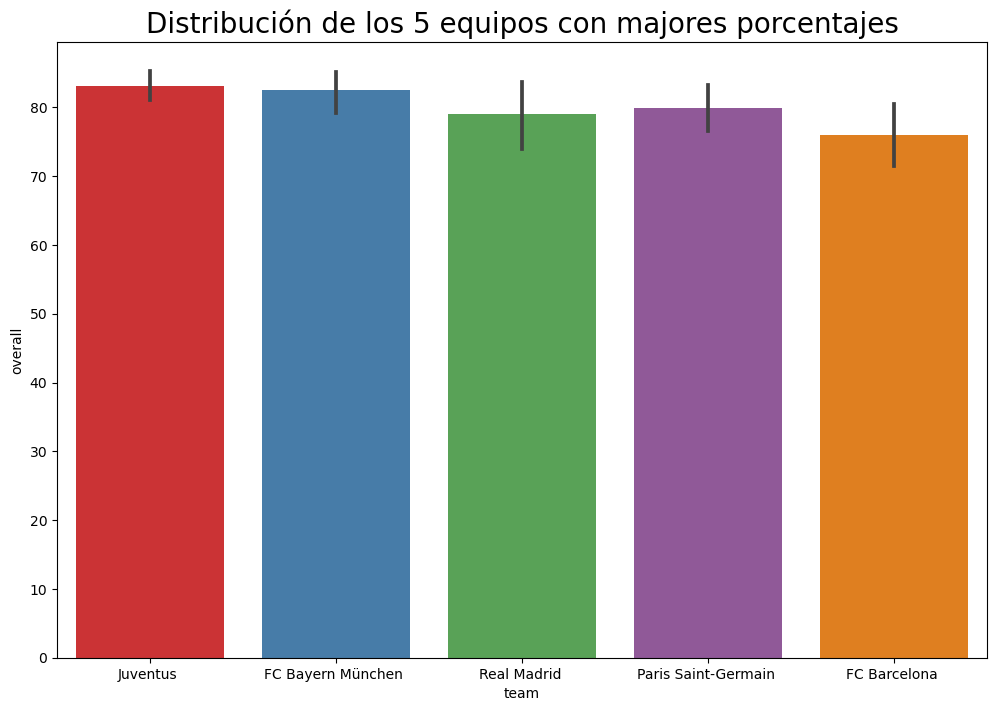

In [58]:
#Los mejores clubes de las ligas de Europa con altos puntajes generales de jugadores
plt.figure(figsize=(12,8))
top = ('FC Barcelona ', 'Juventus ', 'Paris Saint-Germain ', 'Real Madrid ', 'FC Bayern München ')
df2 = df.loc[df['team'].isin(top)  & df['overall'] ]

ax = sns.barplot(x=df2['team'], y=df2['overall'], palette="Set1");
ax.set_title(label='Distribución de los 5 equipos con mejores porcentajes', fontsize=20);

# Concluciones 
- Al revisar las variables de potencial y su calificación, podemos ver que ambas tienen una correlación positiva ya que un indicador va muy de la mano del otro.
- En el continente Americano, los paises del sur son los que tienen más jugadores de los mejores calificados 
- El equipo con mejores jugadores calificados es Juventus


# Referencias 
- Set de datos: FIFA-2021 Detailed EDA - https://www.kaggle.com/code/aayushmishra1512/fifa-2021-detailed-eda/data
- Gráficos: https://www.kaggle.com/roshansharma